<a href="https://colab.research.google.com/github/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/blob/main/Lab4_Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim: This experiment loads the assigned CKD dataset and applies feature scaling, encoding, and feature selection techniques to improve model performance.**

Step 1: Import required libraries & dataset.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


In [4]:
url = "https://raw.githubusercontent.com/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/main/data/chronic_kidney_disease_full.csv"
df = pd.read_csv(url)

# Clean column names
df.columns = df.columns.str.strip().str.replace("'", "")


Step 2: Handle missing values

Separate numeric & categorical columns

In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


Fill median values:

Numerical - median (robust to outliers)

Categorical - mode (most frequent)

In [7]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Step 3: Encode categorical values. We use Label Encoding since:

Most categorical columns are binary (yes/no, present/notpresent)

Required for feature selection & ML models

In [8]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Step 4: Split Features and Target

In [9]:
X = df.drop('class', axis=1)
y = df['class']

Important Note: CKD “class” is categorical, so Linear Regression is not appropriate for real modeling.
BUT since this is a lab exercise, we proceed strictly for learning purposes.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=123
)


Print dataset sizes:

In [11]:
print("Training feature set size:", X_train.shape)
print("Test feature set size:", X_test.shape)
print("Training variable set size:", y_train.shape)
print("Test variable set size:", y_test.shape)


Training feature set size: (280, 24)
Test feature set size: (120, 24)
Training variable set size: (280,)
Test variable set size: (120,)


Import & create linear regression models


In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()


Fit the linear model

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

Calculating model parameter (intercept & coefficients)

In [15]:
print("Intercept:", lm.intercept_)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lm.coef_
})

print(coeff_df)


Intercept: -58.952819258791024
   Feature  Coefficient
0      age     0.000250
1       bp    -0.002437
2       sg    56.859083
3       al    -0.075892
4       su    -0.017261
5      rbc    -0.118693
6       pc    -0.037185
7      pcc     0.113725
8       ba     0.078572
9      bgr    -0.001306
10      bu     0.001536
11      sc    -0.016632
12     sod     0.006773
13     pot    -0.000441
14    hemo     0.122626
15     pcv     0.016913
16    wbcc    -0.003061
17    rbcc    -0.007410
18     htn    -0.312400
19      dm    -0.023553
20     cad     0.041779
21   appet    -0.119655
22      pe     0.023195
23     ane     0.204731


In [17]:
y_pred = lm.predict(X_test)


Model Evaluations:

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.44063315307855466
MSE: 0.2957870687569029
RMSE: 0.5438630974398823
R² Score: 0.6749592651023044


Verification Plot:

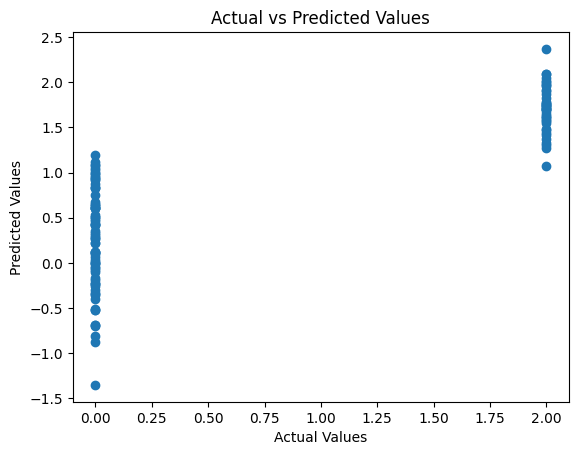

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Conclusion: In this experiment, Linear Regression was applied to the CKD dataset after splitting it into training and testing sets. The model was trained, and its intercept and coefficients were analyzed. Performance was evaluated using MAE, MSE, RMSE, and R² score to verify model accuracy.